In [16]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline  

In [17]:
import sys
print(f"python version : {sys.version}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

python version : 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.19.5
pandas version: 1.1.5


In [18]:
train = pd.read_csv('../data/user_data/train.csv')
train.drop(['id'], axis=1, inplace=True)

test = pd.read_csv('../data/user_data/test.csv')
test.drop(['id'], axis=1, inplace=True)

In [19]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [20]:
print("--------------- train ---------------")
train.info()
print("\n\n--------------- test ---------------")
test.info()

--------------- train ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1015 non-null   object
 1   odometer      1015 non-null   int64 
 2   location      1015 non-null   object
 3   isimported    1015 non-null   object
 4   engine        1015 non-null   object
 5   transmission  1015 non-null   object
 6   fuel          1015 non-null   object
 7   paint         1015 non-null   object
 8   year          1015 non-null   int64 
 9   target        1015 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 79.4+ KB


--------------- test ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         436 non-null    object
 1   odometer      436 non-null

In [21]:
sorted(train['title'].unique())

['ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura ZDX',
 'Audi S6',
 'BMW 325',
 'BMW 335',
 'BMW 528',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 45',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF FA 55. 180',
 'Dodge Charger',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',
 'Infiniti JX',
 'Infiniti M35',
 'Infiniti QX80',
 'Isuzu CABSTER',
 'Isuzu NQR',
 'Iveco TRUCK',
 'JMC Vigus',
 'Jaguar X-Type',
 'Jaguar XJ8',

In [22]:
sorted(test['title'].unique())

['Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'BMW 525',
 'BMW 535',
 'BMW X3',
 'Chevrolet Camaro',
 'DAF XF TRACTOR HEAD',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Explorer',
 'Ford F 150',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Infiniti FX',
 'Iveco EUROCARGO 120e18',
 'Iveco TRUCK',
 'Jeep Wrangler',
 'Kia Optima',
 'Kia Rio',
 'Land Rover Discovery',
 'Land Rover Range Rover',
 'Land Rover Range Rover Sport',
 'Lexus ES 300',
 'Lexus ES 350',
 'Lexus GS 300',
 'Lexus GS 350',
 'Lexus GX 460',
 'Lexus GX 470',
 'Lexus IS 250',
 'Lexus LX 570',
 'Lexus RX 300',
 'Lexus RX 330',
 'Lexus RX 350',
 'Lexus RX 400',
 'MINI Cooper',
 'MINI Cooper Coupé',
 'Mack CXN613 CAB BEHIND ENGINE',
 'Mack R-686ST'

In [23]:
train = train.replace({
    'Mercedes-Benz/52' : 'Mercedes-Benz',
    })

In [24]:
import re 

def clean_text11(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        # review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        # review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp11 = clean_text11(train['title']) #메소드 적용
train['title'] = temp11
print('train data에서 title의 unique 카테고리 개수 : ', len(train['title'].unique()))

train data에서 title의 unique 카테고리 개수 :  203


In [25]:
temp22 = clean_text11(test['title'])
test['title'] = temp22
print('test data에서 title의 unique 카테고리 개수 : ', len(test['title'].unique()))

test data에서 title의 unique 카테고리 개수 :  124


In [26]:
only_train_tt = set(train.title.unique())-set(test.title.unique())
only_test_tt = set(test.title.unique())-set(train.title.unique())

In [27]:
print('------------- only train -------------')
print(len(only_train_tt))
print(only_train_tt)

print('\n\n------------- only test -------------')
print(len(only_test_tt))
print(only_test_tt)

------------- only train -------------
116
{'hyundai tucson', 'jaguar xj8', 'volvo xc90', 'toyota solara', 'lincoln mark', 'mercedesbenz c 250', 'bmw 528', 'mercedesbenz c 63 amg', 'iveco eurotech 750e16', 'mercedesbenz e 200', 'toyota prado', 'toyota dyna 200', 'daf 45', 'volkswagen t6 other', 'bmw 325', 'isuzu nqr', 'volkswagen lt', 'bmw x6', 'ivm lt35', 'infiniti qx80', 'lexus ls 460', 'land rover range rover evoque', 'scania p94 flatbed', 'jmc vigus', 'nissan quest', 'chevrolet traverse', 'dodge charger', 'mitsubishi galant', 'mercedesbenz 709 db', 'volkswagen t4 caravelle', 'alpina b3', 'manvolkswagen flatbed', 'mini cooper countryman', 'kia sorento', 'mack cxn613', 'nissan versa', 'infiniti jx', 'bmw 335', 'man diesel 19314 filtn', 'jeep cherokee', 'volkswagen 1722', 'daf 95xf tractor head', 'mercedesbenz 450', 'mercedesbenz c 450 amg', 'toyota dyna', 'daf fa 55 180', 'nissan maxima', 'gac gonow other', 'nissan rogue', 'kia stinger', 'mack ch613', 'bmw 750', 'nissan frontier', 'n

In [28]:
train['brand'] = train['title'].apply(lambda x:x.split()[0])
test['brand'] = test['title'].apply(lambda x:x.split()[0])

In [29]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,toyota rav 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,toyota
1,toyota land cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,toyota
2,land rover range rover evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,land
3,lexus es 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,lexus
4,toyota venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,toyota


In [30]:
print('------------- train -------------')
print(train.brand.value_counts().head())

print('\n\n------------- test -------------')
print(test.brand.value_counts().head())

------------- train -------------
toyota          474
lexus           122
mercedesbenz    106
honda            81
ford             36
Name: brand, dtype: int64


------------- test -------------
toyota          225
lexus            54
mercedesbenz     42
honda            34
hyundai          11
Name: brand, dtype: int64


In [31]:
only_train_br = set(train.brand.unique())-set(test.brand.unique())
only_test_br = set(test.brand.unique())-set(train.brand.unique())

In [32]:
print('------------- only train -------------')
print(len(only_train_br))
print(only_train_br)

print('\n\n------------- only test -------------')
print(len(only_test_br))
print(only_test_br)

------------- only train -------------
13
{'lincoln', 'gmc', 'scania', 'jaguar', 'gac', 'audi', 'jmc', 'isuzu', 'ivm', 'bentley', 'alpina', 'dodge', 'manvolkswagen'}


------------- only test -------------
1
{'fiat'}


In [33]:
brand_list = train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)
brand_list

,brand,target
0,audi,1.215000e+06
1,gac,1.490000e+06
2,nissan,1.926125e+06
3,mazda,2.078750e+06
4,peugeot,2.125000e+06
5,volkswagen,2.266538e+06
6,jeep,2.515000e+06
7,jaguar,2.665000e+06
8,kia,2.697667e+06
9,pontiac,2.715000e+06


In [34]:
for i,br in enumerate(brand_list.brand):
    train = train.replace({
    br : 10*i,
    })
    
    test = test.replace({
    br : 10*i,
    'Fiat' : 0,
    })

In [35]:
train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)

,brand,target
0,0,1.215000e+06
1,10,1.490000e+06
2,20,1.926125e+06
3,30,2.078750e+06
4,40,2.125000e+06
5,50,2.266538e+06
6,60,2.515000e+06
7,70,2.665000e+06
8,80,2.697667e+06
9,90,2.715000e+06


In [36]:
print('------------- train -------------')
print(sorted(train.location.unique()))

print('\n\n------------- test -------------')
print(sorted(test.location.unique()))

------------- train -------------
['Abia', 'Abia State', 'Abuja', 'Abuja ', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Lagos ', 'Lagos State', 'Ogun', 'Ogun State', 'other']


------------- test -------------
['Abia', 'Abuja', 'Abuja ', 'Arepo ogun state ', 'Lagos', 'Lagos ', 'Lagos State', 'Mushin', 'Ogun', 'Ogun State', 'other']


In [37]:
train = train.replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })

In [38]:
test = test.replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun',
    'Mushin' : 'Lagos',
})

In [39]:
print('------------- train -------------')
print(sorted(train.location.unique()))

print('\n\n------------- test -------------')
print(sorted(test.location.unique()))

------------- train -------------
['Abia', 'Abuja', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Ogun', 'other']


------------- test -------------
['Abia', 'Abuja', 'Lagos', 'Ogun', 'other']


In [40]:
print('------------- train -------------')
print(sorted(train.engine.unique()))

print('\n\n------------- test -------------')
print(sorted(test.engine.unique()))

------------- train -------------
['2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(H4)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


------------- test -------------
['12-cylinder(V12)', '2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


In [41]:
test[(test.engine == '12-cylinder(V12)')]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,mercedesbenz maybach,6758,Lagos,New,12-cylinder(V12),automatic,petrol,Black,2019,310


In [42]:
engine_re = train[['engine', 'target']].groupby(['engine'], as_index=False).mean().sort_values(by='target', ascending=False,ignore_index=True)
engine_re

,engine,target
0,8-cylinder(V8),2.280010e+07
1,4-cylinder(H4),1.139000e+07
2,6-cylinder(V6),7.989856e+06
3,6-cylinder(I6),7.841907e+06
4,4-cylinder(I4),7.294036e+06
5,5-cylinder(I5),3.815000e+06
6,3-cylinder(I3),3.138333e+06
7,2-cylinder(I2),3.015000e+06


In [43]:
train = train.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(I6)' : 50,
    '6-cylinder(V6)' : 60,
    '4-cylinder(H4)' : 70,
    '8-cylinder(V8)' : 80,
    '12-cylinder(V12)' : 90,
})

test = test.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(I6)' : 50,
    '6-cylinder(V6)' : 60,
    '4-cylinder(H4)' : 70,
    '8-cylinder(V8)' : 80,
    '12-cylinder(V12)' : 90,
})

In [44]:
print('------------- train -------------')
print(sorted(train.isimported.unique()))

print('\n\n------------- test -------------')
print(sorted(test.isimported.unique()))

------------- train -------------
['Foreign Used', 'Locally used', 'New ']


------------- test -------------
['Foreign Used', 'Locally used', 'New ']


In [45]:
print('------------- train -------------')
print(sorted(train.transmission.unique()))

print('\n\n------------- test -------------')
print(sorted(test.transmission.unique()))

------------- train -------------
['automatic', 'manual']


------------- test -------------
['automatic', 'manual']


In [46]:
print('------------- train -------------')
print(sorted(train.fuel.unique()))

print('\n\n------------- test -------------')
print(sorted(test.fuel.unique()))

------------- train -------------
['diesel', 'petrol']


------------- test -------------
['diesel', 'petrol']


In [47]:
train.odometer.describe()

count      1015.000000
mean     116842.121182
std      105162.545836
min           0.000000
25%       55918.000000
50%       94972.000000
75%      153224.000000
max      987322.000000
Name: odometer, dtype: float64

In [48]:
sorted(train.paint.unique())

[' Black',
 ' Black/Red',
 'Ash',
 'Ash and black',
 'BLACK',
 'Beige',
 'Black',
 'Black ',
 'Black and silver',
 'Black sand pearl',
 'Black.',
 'Blue',
 'Blue ',
 'Brown',
 'Cream',
 'Cream ',
 'DARK GREY',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark ash',
 'Dark blue ',
 'Dark gray',
 'Dark silver ',
 'Deep Blue',
 'Deep blue',
 'GOLD',
 'Gery',
 'Gold',
 'Gold ',
 'Gray',
 'Gray ',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Ink blue',
 'Light Gold',
 'Light blue',
 'Light silver ',
 'Magnetic Gray',
 'Magnetic Gray Metallic',
 'Maroon',
 'Midnight Black Metal',
 'Milk',
 'Navy blue',
 'Off white',
 'Off white l',
 'Pale brown',
 'Purple',
 'Red',
 'Redl',
 'SILVER',
 'Silver',
 'Silver ',
 'Silver/grey',
 'Sky blue',
 'Skye blue',
 'Sliver',
 'Super White',
 'WHITE',
 'WINE',
 'Whine ',
 'White',
 'White ',
 'White orchild pearl',
 'Wine',
 'Yellow',
 'blue',
 'green',
 'orange',
 'red',
 'white',
 'white-blue',
 'yellow']

In [49]:
sorted(test.paint.unique())

['  Brown',
 'Ash',
 'BLACK',
 'Beige',
 'Blac',
 'Black',
 'Black ',
 'Blue',
 'Blue ',
 'Brown',
 'Classic Silver Met(1F7)',
 'Cream',
 'Cream ',
 'Dark Ash',
 'Dark Blue',
 'Dark Green',
 'Dark Grey',
 'Dark blue ',
 'GOLD',
 'Gold',
 'Gold ',
 'Golf',
 'Gray',
 'Green',
 'Green ',
 'Grey',
 'Grey ',
 'Grey and black',
 'Indigo ink pearl',
 'Light Grey',
 'Maroon',
 'Mint green',
 'Navy blue',
 'Red',
 'Silver',
 'Silver ',
 'Sliver',
 'Sliver ',
 'White',
 'White and green',
 'Wine',
 'Yellow',
 'black',
 'blue',
 'green',
 'white']

In [50]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [51]:
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [52]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)

In [53]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  18


In [54]:
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

test data에서 paint의 unique 카테고리 개수 :  17


In [55]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [56]:
sorted(test.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'golf',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [57]:
train = train.replace({
    'milk' : 'cream',
    'maroon' : 'red',
    'wine' : 'red',
})

test = test.replace({
    'indigo ink pearl' : 'blue',
    'golf' : 'green',
    'maroon' : 'red',
    'wine' : 'red',
})

In [58]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  15
test data에서 paint의 unique 카테고리 개수 :  13


In [59]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'yellow']

In [60]:
train['colorType'] = train['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic
test['colorType'] = test['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic

In [61]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,toyota rav 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,13665000,230,chromatic
1,toyota land cruiser,10,Lagos,New,40,automatic,petrol,black,2019,33015000,230,achromatic
2,land rover range rover evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,9915000,380,chromatic
3,lexus es 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,3815000,320,achromatic
4,toyota venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,7385000,230,chromatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,toyota corolla,46768,Lagos,Foreign Used,40,automatic,petrol,black,2014,5415000,230,achromatic
1011,toyota camry,31600,Abuja,Foreign Used,40,automatic,petrol,silver,2011,3615000,230,achromatic
1012,toyota camry,96802,Abuja,Foreign Used,40,automatic,petrol,black,2011,3415000,230,achromatic
1013,lexus gx 460,146275,Lagos,Foreign Used,60,automatic,petrol,gold,2013,14315000,320,chromatic


In [62]:
print('------------- train -------------')
print(sorted(train.year.unique()))

print('\n\n------------- test -------------')
print(sorted(test.year.unique()))

------------- train -------------
[1217, 1218, 1980, 1982, 1985, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


------------- test -------------
[1324, 1726, 1987, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2626]


In [63]:
train[(train.year == 1217) | (train.year == 1218)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
415,mercedesbenz atego,403461,Lagos,Locally used,40,manual,diesel,white,1218,6015000,310,achromatic
827,310,510053,Lagos,Locally used,60,manual,diesel,white,1217,75015000,310,achromatic


In [64]:
test[(test.title == 'Mercedes-Benz ATEGO')|(test.title == 'Mercedes-Benz/52')]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType


In [65]:
test[(test.year == 1324) | (test.year == 1726)| (test.year == 2626)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
304,mercedesbenz cabin plus chassis only,650923,Lagos,Locally used,60,manual,diesel,blue,1324,310,chromatic
406,mercedesbenz dump truck,0,Lagos,Locally used,80,manual,diesel,white,2626,310,achromatic
411,mercedesbenz water tanker,701934,Lagos,Locally used,80,manual,diesel,white,1726,310,achromatic


In [66]:
train[(train.brand == 'Mercedes-Benz') & (train.odometer == 0)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType


In [67]:
train['year'] = train['year'].apply(lambda x:0 if x<1900 or x>2022 else x)
test['year'] = test['year'].apply(lambda x:0 if x<1900 or x>2022 else x)

In [68]:
print('------------- train -------------')
print(sorted(train.year.unique()))

print('\n\n------------- test -------------')
print(sorted(test.year.unique()))

------------- train -------------
[0, 1980, 1982, 1985, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


------------- test -------------
[0, 1987, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [69]:
train[(train.target > 100000000)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
341,land rover range rover sport,18720,Lagos,Foreign Used,80,automatic,petrol,grey,2019,117015000,380,achromatic
569,lexus lx 570,55530,Abuja,Foreign Used,80,automatic,petrol,black,2014,110015000,320,achromatic
597,rollsroyce ghost,16069,Lagos,Locally used,40,automatic,petrol,black,2011,150015008,390,achromatic
736,mercedesbenz g 63 amg,20,Lagos,New,80,automatic,petrol,black,2019,108690000,310,achromatic


In [70]:
train.loc[341,'target'] = 33015000
train.loc[569,'target'] = 29015000
train.loc[736,'target'] = 60015000

In [71]:
train['target'] = train['target'].apply(lambda x:np.log(x))

In [72]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,toyota rav 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,16.430348,230,chromatic
1,toyota land cruiser,10,Lagos,New,40,automatic,petrol,black,2019,17.312473,230,achromatic
2,land rover range rover evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,16.109559,380,chromatic
3,lexus es 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,15.154451,320,achromatic
4,toyota venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,15.814961,230,chromatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,toyota corolla,46768,Lagos,Foreign Used,40,automatic,petrol,black,2014,15.504683,230,achromatic
1011,toyota camry,31600,Abuja,Foreign Used,40,automatic,petrol,silver,2011,15.100602,230,achromatic
1012,toyota camry,96802,Abuja,Foreign Used,40,automatic,petrol,black,2011,15.043688,230,achromatic
1013,lexus gx 460,146275,Lagos,Foreign Used,60,automatic,petrol,gold,2013,16.476818,320,chromatic


In [73]:
test

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,mercedesbenz c 300,1234,Abuja,New,40,automatic,petrol,white,2017,310,achromatic
1,honda accord,29938,Abuja,Foreign Used,40,automatic,petrol,white,2013,170,achromatic
2,mercedesbenz s 550,87501,Lagos,Foreign Used,40,automatic,petrol,black,2012,310,achromatic
3,toyota sienna,180894,Lagos,Locally used,60,automatic,petrol,grey,2001,230,achromatic
4,toyota hiace,104814,Lagos,Foreign Used,40,automatic,petrol,white,2000,230,achromatic
...,...,...,...,...,...,...,...,...,...,...,...
431,mercedesbenz glk 350,78175,Lagos,Foreign Used,60,automatic,petrol,blue,2014,310,chromatic
432,honda crosstour,129223,Lagos,Foreign Used,60,automatic,petrol,red,2011,170,chromatic
433,mercedesbenz ml 350,100943,Lagos,Foreign Used,40,automatic,petrol,black,2013,310,achromatic
434,lexus gx 470,81463,Lagos,Foreign Used,40,automatic,petrol,green,2003,320,chromatic


In [74]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['brand','engine','odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

c:\Users\WAI\Anaconda3\envs\pycaret\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\WAI\Anaconda3\envs\pycaret\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Text(0.5, 1.0, 'Correlation between features')

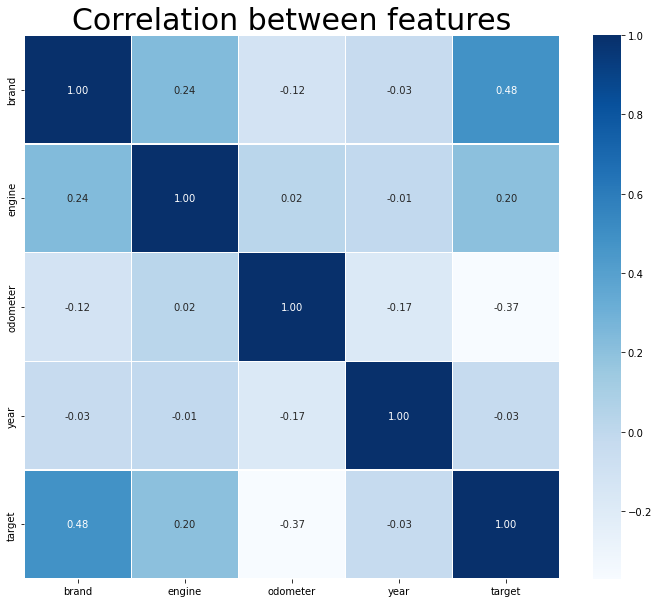

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [79]:
from pycaret.regression import *

reg_test_1 = setup(data=train,
                   target='target',
                   train_size= 0.8,
                   #test_data=test,
                   #use_gpu =True,
                   normalize=True,
                   normalize_method ='minmax',
                   remove_perfect_collinearity=False,
                   numeric_features = ['engine','brand'],
                   fold=10,
                   session_id=42
                   )

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:36:29
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
title,Categorical
odometer,Numeric
location,Categorical
isimported,Categorical
engine,Numeric
transmission,Categorical
fuel,Categorical
paint,Categorical
year,Numeric
brand,Numeric


In [ ]:
best= compare_models(sort='nmae',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2282,0.1090,0.3247,0.8753,0.0198,0.0148,0.9160
et,Extra Trees Regressor,0.2300,0.1207,0.3401,0.8592,0.0206,0.0149,0.3050
xgboost,Extreme Gradient Boosting,0.2423,0.1301,0.3557,0.8508,0.0216,0.0158,0.2580
rf,Random Forest Regressor,0.2452,0.1266,0.3505,0.8525,0.0212,0.0159,0.2780
gbr,Gradient Boosting Regressor,0.2491,0.1273,0.3519,0.8523,0.0213,0.0162,0.0820
lightgbm,Light Gradient Boosting Machine,0.2672,0.1423,0.3707,0.8354,0.0225,0.0173,0.1120
dt,Decision Tree Regressor,0.3023,0.1925,0.4337,0.7750,0.0262,0.0196,0.0280
ada,AdaBoost Regressor,0.3510,0.2058,0.4512,0.7565,0.0274,0.0229,0.0860
br,Bayesian Ridge,0.4460,0.3280,0.5688,0.6151,0.0345,0.0289,0.0220
ridge,Ridge Regression,0.4460,0.3276,0.5685,0.6154,0.0344,0.0289,0.0140


In [ ]:
best

 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='reg:squarederror', random_state=42, reg_alpha=0,
              reg_l

In [ ]:
top5 = [rank for rank in best]
top5_tune = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4036,0.3440,0.5865,0.6851,0.0348,0.0259
1,0.3796,0.2325,0.4822,0.7049,0.0287,0.0240
2,0.3033,0.1466,0.3828,0.7922,0.0234,0.0198
3,0.3153,0.1922,0.4384,0.6889,0.0264,0.0204
4,0.2913,0.1435,0.3789,0.8471,0.0227,0.0187
5,0.3156,0.1634,0.4042,0.8397,0.0249,0.0208
6,0.2906,0.1537,0.3920,0.8202,0.0235,0.0187
7,0.3308,0.1645,0.4056,0.7554,0.0250,0.0218
8,0.3490,0.2250,0.4744,0.7799,0.0284,0.0222


In [ ]:
blended = blend_models(estimator_list = best,
                       fold = 10,
                    #    method = 'soft',
                       optimize='mae',
                       )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2713,0.2331,0.4828,0.7866,0.0282,0.0172
1,0.2508,0.1113,0.3336,0.8588,0.0200,0.0159
2,0.1952,0.0712,0.2669,0.8990,0.0163,0.0128
3,0.1985,0.0993,0.3151,0.8393,0.0189,0.0128
4,0.1985,0.0778,0.2789,0.9171,0.0170,0.0129
5,0.2235,0.1001,0.3164,0.9018,0.0199,0.0149
6,0.1837,0.0711,0.2666,0.9168,0.0160,0.0119
7,0.1831,0.0568,0.2382,0.9156,0.0147,0.0121
8,0.2668,0.1353,0.3678,0.8677,0.0222,0.0171


In [ ]:
final_model = finalize_model(blended)

In [ ]:
y_test = predict_model(final_model, data =test)
y_test = np.exp(y_test['Label'])

NameError: name 'final_model' is not defined

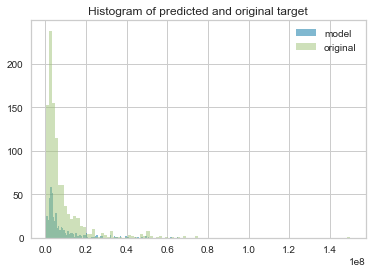

In [ ]:
# histogram of scaled target
label_fix = np.exp(train.target) #*M_label
plt.hist(y_test, bins=100, label='model', alpha=0.5)
plt.hist(label_fix, bins=100, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')
plt.legend()
plt.show()

In [ ]:
submission = pd.read_csv('../data/user_data/sample_submission.csv')
submission['target'] = y_test
submission.to_csv('../data/user_data/submit0608_3.csv', index=False)